# Simulating Type I Error

* Null must be true.
* Find proportion of the time we reject (mistake)

### Example

$ H_0: \mu = 10 $

$ H_a: \mu < 10 $

In [3]:
n <- 20
mu <- 10  # Why?
sigma <-5
xs <- rnorm(n, mu, sigma)
xs

[1] 18.727389  7.365044  5.025498 10.453263  6.149964 15.814431 14.384880
 [8]  6.162756 18.140506 14.683596 13.692462  8.558471 21.017098  6.076927
[15] 14.286034 13.891121  9.507391  7.126187 10.029750  5.591866

In [2]:
mu0 <- 10
se <- sd(xs)/sqrt(length(xs))
t <- (mean(xs) - mu0)/se
pval <- pt(t, n - 1)
pval

[1] 0.7721024

In [4]:
# TODO: Make a function to allow repeated application
pval <- function(xs, mu0 = 10) {
    se <- sd(xs)/sqrt(length(xs))
    t <- (mean(xs) - mu0)/se
    pval <- pt(t, n - 1)
    return(pval)}
pval(xs)

[1] 0.8806403

In [4]:
# Apply pval to a new sample
xs <- rnorm(n, mu, sigma)
pval(xs)

[1] 0.04339152

In [5]:
# Make this a function
get_pval <- function(n) {
    xs <- rnorm(n, mu, sigma)
    return(pval(xs))}
get_pval(20)

[1] 0.02373514

In [6]:
# TODO: Use replicated to run this command 5 times
ps <- replicate(5, get_pval(n))
ps

[1] 0.6038724 0.1292703 0.4352366 0.3089247 0.3809416

In [7]:
# Use a boolean to find the proportion that are less than 5% (0.05)
mean(ps < 0.05)

[1] 0

In [9]:
# Now apply this to many more trials
ps <- replicate(100000, get_pval(n))
mean(ps < 0.05)

[1] 0.04914

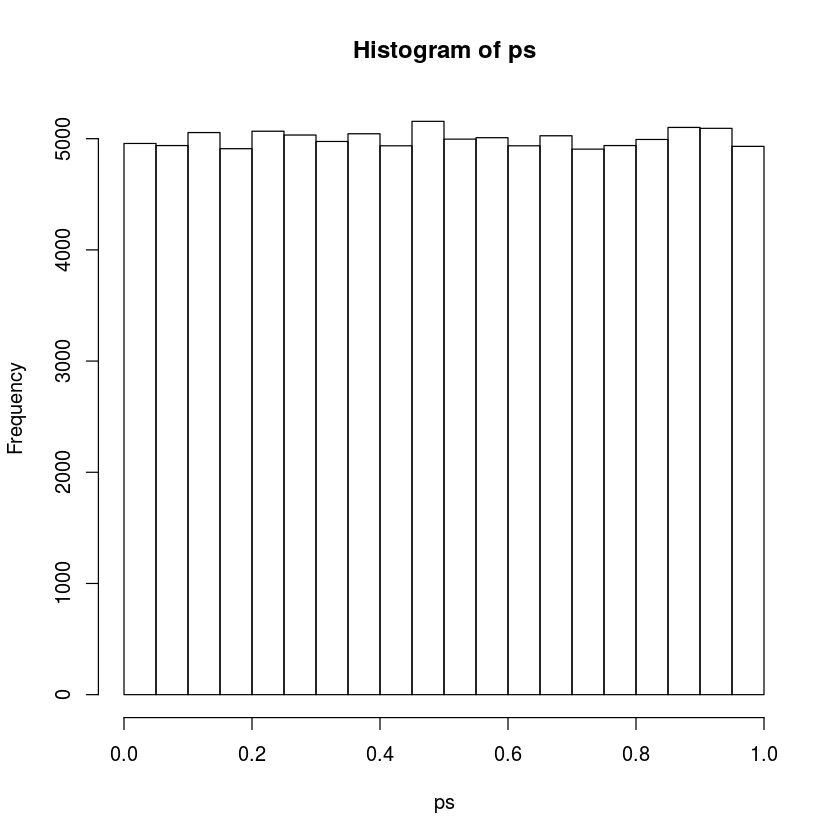

In [25]:
hist(ps)

In [5]:
ps <- replicate(10000, pval(rnorm(5, 5, 1)))
mean(ps < 0.05)

[1] 1